## ECHO Memo 045: Sensitivity of an LWA antenna to the ECHO transmitter
Mrudula Gopalkrishna <br>
15 Feb 2021

__Summary__ : <span style = "font-size:1em;"> This memo evaluates the signal strength of the ECHO transmitter designed by <b>Titu Samson</b> and the resulting SNR as seen by an LWA antenna </span> 


__Properties of a single LWA antenna__

* Gain at zenith = 6dBi ~ 4 times an isotropic antenna in linear units
* Noise temp of LNA = 250 K 
* $T_{sys} = 50\lambda^{2.56}$ -- Galactic background radio emission, obs status page


In [1]:
%matplotlib notebook
import numpy as np 
import matplotlib.pyplot as plt

In [2]:
freq_range = np.arange(20,88,2)
freq_range

array([20, 22, 24, 26, 28, 30, 32, 34, 36, 38, 40, 42, 44, 46, 48, 50, 52,
       54, 56, 58, 60, 62, 64, 66, 68, 70, 72, 74, 76, 78, 80, 82, 84, 86])

In [3]:
c = 3*1e8
wavelength = c/(freq_range*1e6)
wavelength

array([15.        , 13.63636364, 12.5       , 11.53846154, 10.71428571,
       10.        ,  9.375     ,  8.82352941,  8.33333333,  7.89473684,
        7.5       ,  7.14285714,  6.81818182,  6.52173913,  6.25      ,
        6.        ,  5.76923077,  5.55555556,  5.35714286,  5.17241379,
        5.        ,  4.83870968,  4.6875    ,  4.54545455,  4.41176471,
        4.28571429,  4.16666667,  4.05405405,  3.94736842,  3.84615385,
        3.75      ,  3.65853659,  3.57142857,  3.48837209])

<IPython.core.display.Javascript object>


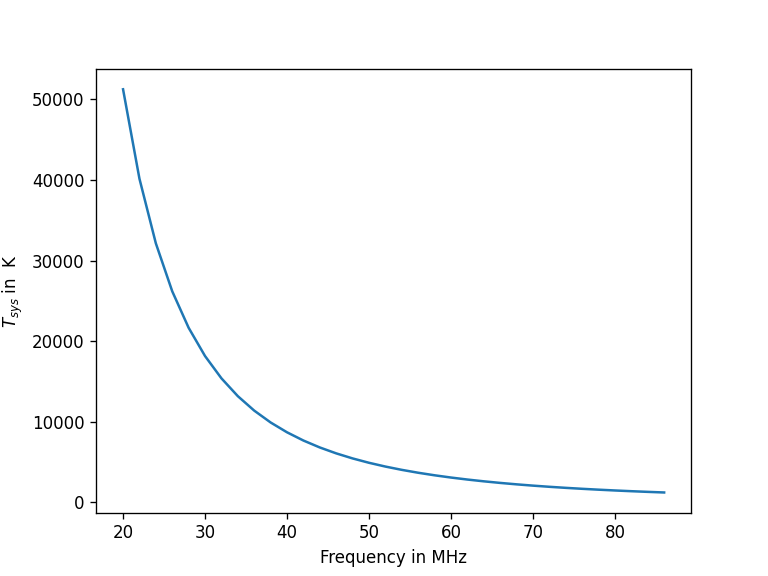

Text(0, 0.5, '$T_{sys}$ in  K')

In [4]:
t_lna = 250 #Kelvin
tsys = (50*(wavelength)**2.56) #Kelvin
plt.figure()
plt.plot(freq_range, tsys)
plt.xlabel('Frequency in MHz')
plt.ylabel('$T_{sys}$ in  K')

<IPython.core.display.Javascript object>


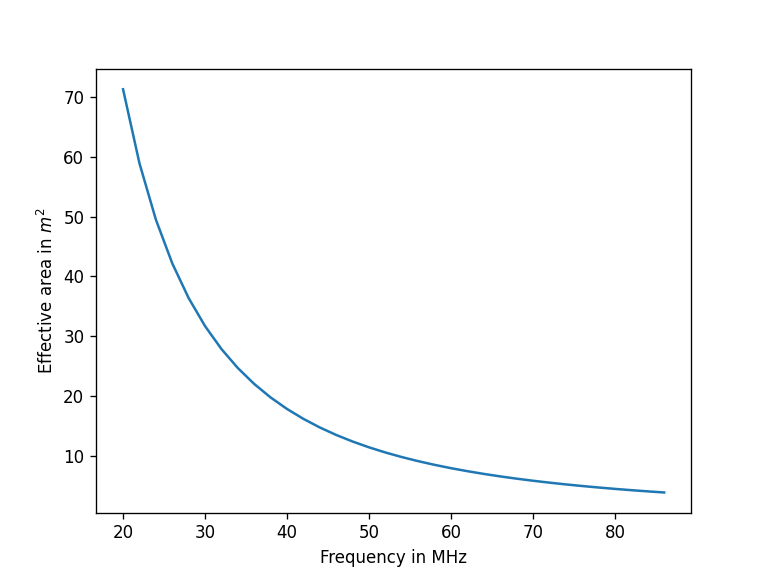

Text(0, 0.5, 'Effective area in $m^2$')

In [5]:
lwa_gain_dbi = 6 #dBi
lwa_gain_linear = 10**(lwa_gain_dbi/10)
effective_area = ((wavelength)**2/(4*np.pi))*lwa_gain_linear
plt.figure()
plt.plot(freq_range, effective_area)
plt.xlabel('Frequency in MHz')
plt.ylabel('Effective area in $m^2$')

<IPython.core.display.Javascript object>


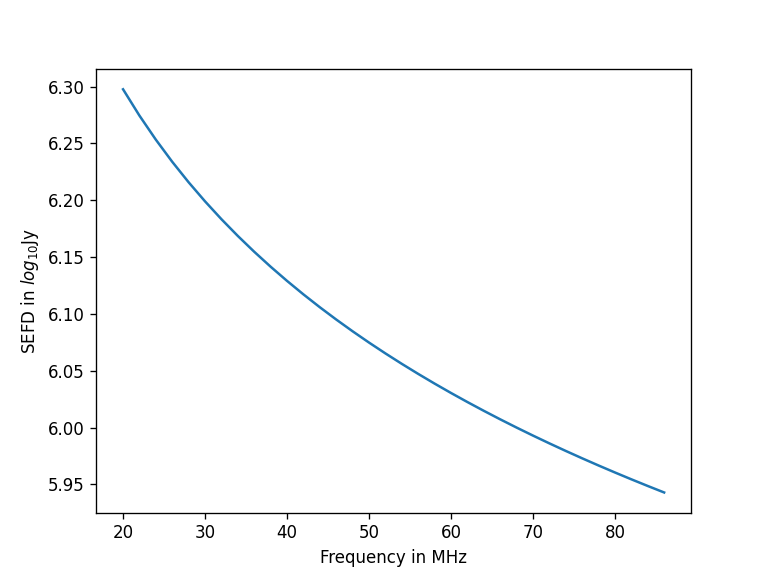

Text(0, 0.5, 'SEFD in $log_{10}$Jy')

In [6]:
k = 1.38*1e-23 #boltzmann constant 
sefd = ((2*k*tsys)/effective_area)*1e26 #Jy 
plt.figure()
plt.plot(freq_range, np.log10(sefd))
plt.xlabel('Frequency in MHz')
plt.ylabel('SEFD in $log_{10}$Jy')

<span style = "font-size:20px;"> $P_{received} = S * A_{e} \implies S = \frac{P_{received}} {A_{e}} $ <br>

$P_{received} $ = Received power at LWA in $W$ <br>
S = Flux density in $W/m^{2}$ <br>
$A_{e}$ = Effective area in $m^{2}$ <br>

dBm to Watts: $P_{dBm} = \frac{10^{\frac{P_{dBm}}{10}}}{1000} = 10^{\frac{P_{dBm}-30}{10}} $ </span>


In [7]:
P_received_dBm = -58
P_received_watts = 2*1e-9 #in watts 
tx_flux_density = (P_received_watts/effective_area)*1e26 #Jy 

<IPython.core.display.Javascript object>


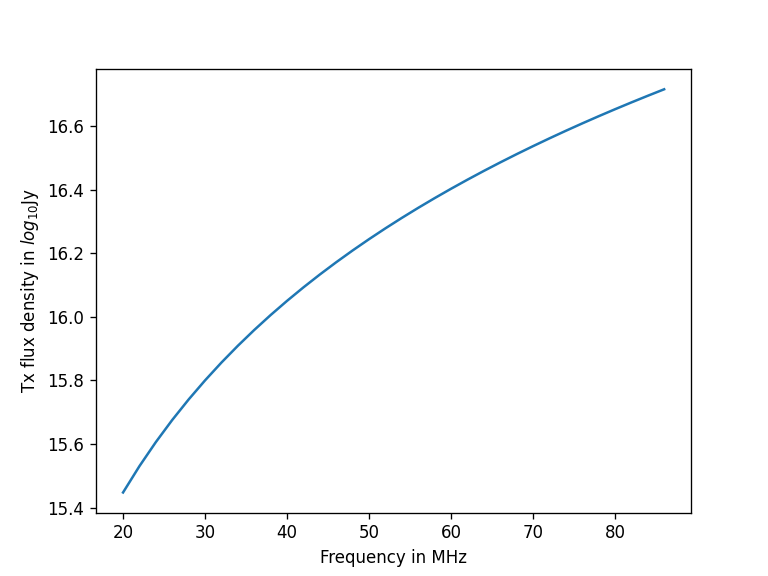

Text(0, 0.5, 'Tx flux density in $log_{10}$Jy')

In [8]:
plt.figure()
plt.plot(freq_range, np.log10(tx_flux_density))
plt.xlabel('Frequency in MHz')
plt.ylabel('Tx flux density in $log_{10}$Jy')

In [9]:
snr = np.log10(tx_flux_density) - np.log10(sefd)
snr

array([ 9.15035729,  9.25632256,  9.35306128,  9.44205227,  9.52444506,
        9.60115091,  9.67290444,  9.74030652,  9.8038549 ,  9.8639665 ,
        9.92099407,  9.97523868, 10.02695935, 10.07638055, 10.12369806,
       10.16908371, 10.21268906, 10.25464852, 10.29508185, 10.33409616,
       10.3717877 , 10.40824322, 10.44354123, 10.47775297, 10.51094331,
       10.54317148, 10.57449169, 10.6049537 , 10.63460329, 10.66348268,
       10.69163086, 10.71908396, 10.74587547, 10.77203653])

<IPython.core.display.Javascript object>


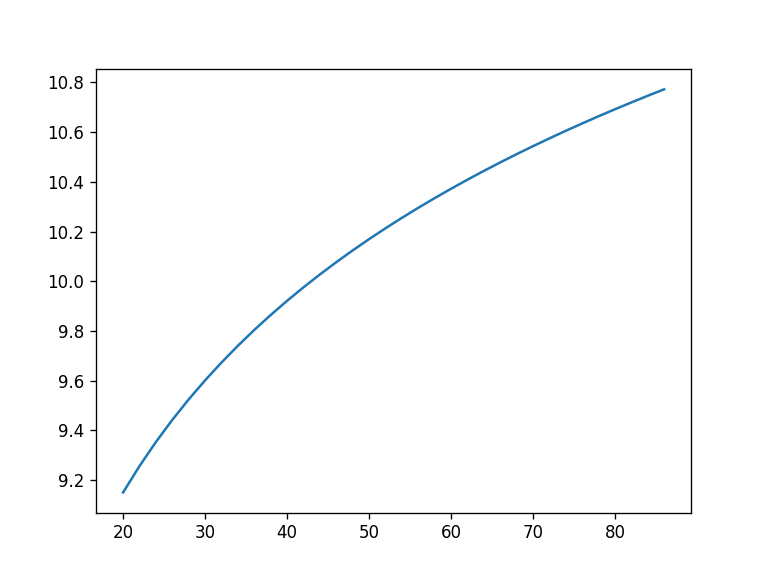

In [10]:
plt.figure()
plt.plot(freq_range, snr)